<h1>Week 8: Deploying Machine-Learning Solutions in IoT</h1>

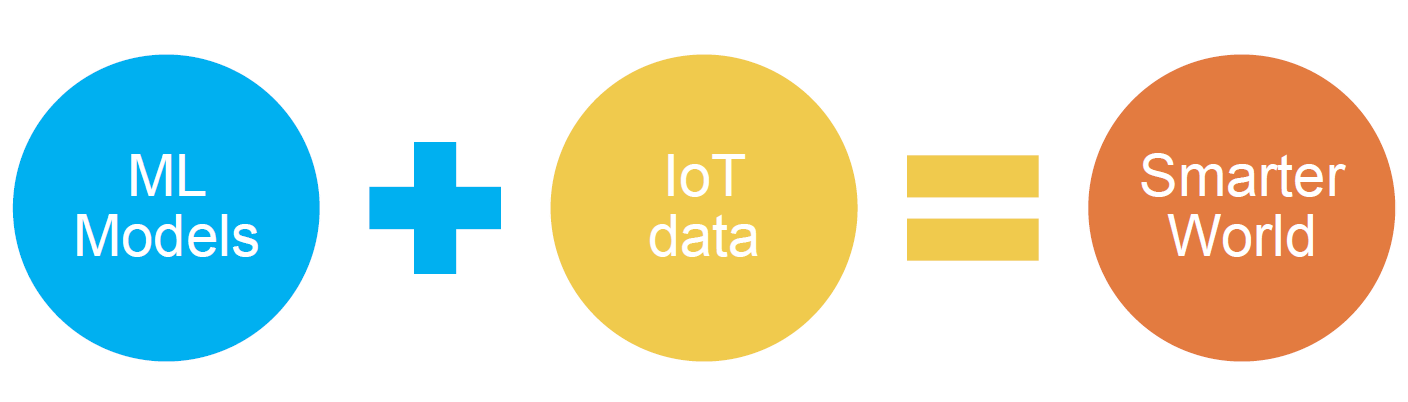

<hr>
In Week 7, we covered the fundamentals of Machine Learning, exploring key concepts and building simple models using the Titanic Survival dataset. We also learned how to make predictions using these models, though our work was limited to a Jupyter Notebook environment. This week, we will take it a step further by deploying a machine learning model on a Raspberry Pi. We will use real-time data collected from the ADXL343 sensor to make live predictions, bringing our models from theory to practical application in IoT.

This week, you'll work with a new dataset that contains 3-axis acceleration data for Human Activity Recognition. This data was collected at a sampling rate of 20Hz, with each sample representing a 3-second window. The dataset includes two activity labels:

- Walking: This category encompasses various walking activities, including walking up or down stairs, looking at a phone, and engaging in social interactions.
- Sitting: This label covers periods when the person was seated, performing general office tasks.

You can download the CSV file from this week's module. Once downloaded, you can begin examining the data using Pandas.
<hr>

### Import necessary libraries

In [18]:
import pandas as pd              # Used for data manipulation and analysis
import numpy as np               # Used for numerical operations and arrays
import matplotlib.pyplot as plt  # Import the matplotlib library's pyplot module for plotting data visualizations
import seaborn as sns            # Import the seaborn library for advanced data visualization
import ast                       # Import the ast module for abstract syntax tree operations

### Import specific modules from scikit-learn for model creation and evaluation

In [51]:
from sklearn.model_selection import train_test_split               # Used to split data into training and testing sets
from sklearn.svm import SVC                                        # SVC for classification
from sklearn.metrics import accuracy_score, classification_report  # Metrics to evaluate model performance
from sklearn.metrics import ConfusionMatrixDisplay                 # used to display confusion matrix
from sklearn.preprocessing import StandardScaler                   # Import the StandardScaler from scikit-learn's preprocessing module

# Data Overview

### Load and display the dataset into a pandas DataFrame

In [20]:
df = pd.read_csv("week8_data.csv")
df.head(10)  

x_values  \
0  [-1.2552512, -1.2160246, -1.0983448, -1.216024...   
1  [-1.1767979999999998, -1.1767979999999998, -1....   
2  [-1.0983448, -1.0983448, -1.1375714, -1.098344...   
3  [-1.1767979999999998, -1.1767979999999998, -1....   
4  [0.2353596, 0.2353596, 0.3138128, 0.2745862, 0...   
5  [0.2353596, 0.2745862, 0.2353596, 0.3138128, 0...   
6  [0.2353596, 0.3138128, 0.196133, 0.2745862, 0....   
7  [3.8834334, 4.0795664, 4.158019599999999, 3.33...   
8  [0.3530394, 0.392266, 0.4707192, 0.392266, 0.3...   
9  [1.2552512, 1.1375714, 0.3138128, -0.1569064, ...   

                                            y_values  \
0  [1.6475172, 1.2160246, 1.6475172, 0.9414384, 1...   
1  [1.2944778, 1.1767979999999998, 1.3337044, 1.1...   
2  [1.0591182, 1.2160246, 1.2944778, 1.0983448, 1...   
3  [1.2552512, 1.1375714, 1.1375714, 1.1767979999...   
4  [-0.196133, -0.196133, -0.196133, -0.2353596, ...   
5  [-0.196133, -0.2353596, -0.1569064, -0.196133,...   
6  [-0.1569064, -0.2353596, -0.1569064, -0.235359...   
7  [7.4138274, 4.314926, 5.4917240000000005, -1.5...   
8  [-0.1569064, -0.0784532, -0.1176798, -0.078453...   
9  [9.4536106, 9.4536106, 9.3751574, 9.2574776, 8...   

                                            z_values    label  
0  [8.7867584, 8.7867584, 8.747531799999999, 8.82...  walking  
1  [8.8652116, 8.8652116, 8.825985, 8.9044382, 8....  walking  
2  [8.9044382, 8.8652116, 8.8652116, 8.8652116, 8...  walking  
3  [8.7867584, 8.825985, 8.825985, 8.825985, 8.82...  walking  
4  [9.1005712, 9.0613446, 9.0613446, 9.1005712, 9...  walking  
5  [9.1005712, 9.1397978, 9.0613446, 9.0613446, 9...  walking  
6  [9.022118, 8.9828914, 9.022118, 9.1397978, 9.0...  walking  
7  [8.9436648, 7.8845466, 9.4536106, 10.002782999...  walking  
8  [9.0613446, 8.9828914, 9.1005712, 9.1397978, 9...  walking  
9  [2.1182364, 2.157463, 1.8828768, 1.5298374, 1....  walking

### Print the shape of the dataset to understand its dimensions (rows, columns)

In [21]:
print(df.shape)   #Print the shape 

(2000, 4)


### Display a concise summary of the DataFrame

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   x_values  2000 non-null   object
 1   y_values  2000 non-null   object
 2   z_values  2000 non-null   object
 3   label     2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


### Print a list of column names in the dataset to understand the available features

In [23]:
print(list(df.columns))    # Print a list of column names

['x_values', 'y_values', 'z_values', 'label']


### Calculate the total number of missing values in each column of the dataset

In [24]:
missing_values = df.isnull().sum()   # Calculate the total number of missing values
print(missing_values)                  # Print the number of missing values for each column to identify data completeness issues

x_values    0
y_values    0
z_values    0
label       0
dtype: int64


### Count the occurrences of each unique value in the 'label' column

In [25]:
label_counts = df['label'].value_counts()
label_counts

label
walking    1000
sitting    1000
Name: count, dtype: int64

### Plotting the label counts as a bar chart

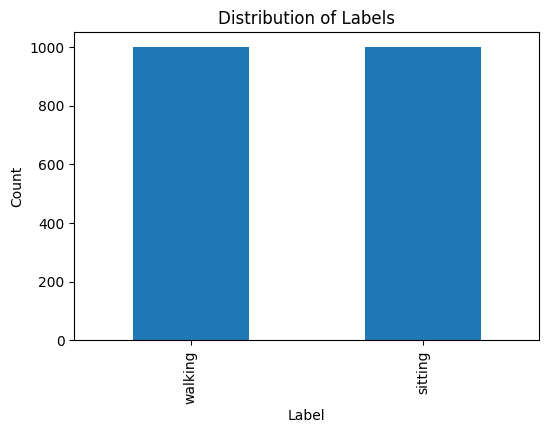

In [26]:
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Convert string representations of lists back into actual Python lists

<hr>

We can verify that the dataset contains 2,000 samples, with 1,000 labeled as walking and another 1,000 as sitting.

Currently, the values are stored as strings in the DataFrame columns. Before processing, we'll need to convert these string values back into Python lists.

<hr>

In [27]:
df['x_values'] = df['x_values'].apply(ast.literal_eval)  # Converts strings in 'x_values' column to lists
df['y_values'] = df['y_values'].apply(ast.literal_eval)  # Converts strings in 'y_values' column to lists
df['z_values'] = df['z_values'].apply(ast.literal_eval)  # Converts strings in 'z_values' column to lists

In [18]:
df

x_values  \
0     [-1.2552512, -1.2160246, -1.0983448, -1.216024...   
1     [-1.1767979999999998, -1.1767979999999998, -1....   
2     [-1.0983448, -1.0983448, -1.1375714, -1.098344...   
3     [-1.1767979999999998, -1.1767979999999998, -1....   
4     [0.2353596, 0.2353596, 0.3138128, 0.2745862, 0...   
...                                                 ...   
1995  [6.2370294, 6.1978028, 6.1585762, 6.1978028, 6...   
1996  [6.2370294, 6.276256, 6.1585762, 6.3154826, 6....   
1997  [6.1978028, 6.1585762, 6.1585762, 6.2370294, 6...   
1998  [6.1978028, 6.2370294, 6.1978028, 6.1585762, 6...   
1999  [6.3154826, 6.1585762, 6.2370294, 6.276256, 6....   

                                               y_values  \
0     [1.6475172, 1.2160246, 1.6475172, 0.9414384, 1...   
1     [1.2944778, 1.1767979999999998, 1.3337044, 1.1...   
2     [1.0591182, 1.2160246, 1.2944778, 1.0983448, 1...   
3     [1.2552512, 1.1375714, 1.1375714, 1.1767979999...   
4     [-0.196133, -0.196133, -0.196133, -0.2353596, ...   
...                                                 ...   
1995  [6.7469752000000005, 6.864655, 6.7862018000000...   
1996  [6.668522, 6.8254284, 7.1000146, 6.5116156, 6....   
1997  [6.7077486, 6.864655, 6.786201800000001, 6.903...   
1998  [6.864655, 6.786201800000001, 6.78620180000000...   
1999  [6.982334799999999, 6.668522, 6.6292954, 6.590...   

                                               z_values    label  
0     [8.7867584, 8.7867584, 8.747531799999999, 8.82...  walking  
1     [8.8652116, 8.8652116, 8.825985, 8.9044382, 8....  walking  
2     [8.9044382, 8.8652116, 8.8652116, 8.8652116, 8...  walking  
3     [8.7867584, 8.825985, 8.825985, 8.825985, 8.82...  walking  
4     [9.1005712, 9.0613446, 9.0613446, 9.1005712, 9...  walking  
...                                                 ...      ...  
1995  [3.4911673999999997, 3.5696205999999995, 3.569...  sitting  
1996  [3.6088471999999996, 3.6480737999999997, 3.530...  sitting  
1997  [3.6088471999999996, 3.6480737999999997, 3.648...  sitting  
1998  [3.6088471999999996, 3.5696205999999995, 3.530...  sitting  
1999  [3.4911673999999997, 3.5696205999999995, 3.530...  sitting  

[2000 rows x 4 columns]

# Feature Extraction

<hr>

As we covered in Week 5, we can proceed with some simple feature extraction on the dataset.

<hr>

In [28]:
# Function to calculate the mean of a list
def calculate_mean(lst):
    return sum(lst) / len(lst)  # Returns the average value of the list

# Function to calculate the range of values in a list
def calculate_range(lst):
    return max(lst) - min(lst)  # Returns the difference between the max and min values

# Function to calculate the correlation between two lists
def calculate_correlation(list1, list2):
    return np.corrcoef(list1, list2)[0, 1]  # Returns the Pearson correlation coefficient between two lists

### Calculate the mean of acceleration values in each axis and add them as new columns

In [30]:
df['x_mean'] = df['x_values'].apply(calculate_mean)  # Calculates the mean of x-axis values
df['y_mean'] = df['y_values'].apply(calculate_mean)  # Calculates the mean of y-axis values
df['z_mean'] = df['z_values'].apply(calculate_mean)  # Calculates the mean of z-axis values

In [31]:
df

x_values  \
0     [-1.2552512, -1.2160246, -1.0983448, -1.216024...   
1     [-1.1767979999999998, -1.1767979999999998, -1....   
2     [-1.0983448, -1.0983448, -1.1375714, -1.098344...   
3     [-1.1767979999999998, -1.1767979999999998, -1....   
4     [0.2353596, 0.2353596, 0.3138128, 0.2745862, 0...   
...                                                 ...   
1995  [6.2370294, 6.1978028, 6.1585762, 6.1978028, 6...   
1996  [6.2370294, 6.276256, 6.1585762, 6.3154826, 6....   
1997  [6.1978028, 6.1585762, 6.1585762, 6.2370294, 6...   
1998  [6.1978028, 6.2370294, 6.1978028, 6.1585762, 6...   
1999  [6.3154826, 6.1585762, 6.2370294, 6.276256, 6....   

                                               y_values  \
0     [1.6475172, 1.2160246, 1.6475172, 0.9414384, 1...   
1     [1.2944778, 1.1767979999999998, 1.3337044, 1.1...   
2     [1.0591182, 1.2160246, 1.2944778, 1.0983448, 1...   
3     [1.2552512, 1.1375714, 1.1375714, 1.1767979999...   
4     [-0.196133, -0.196133, -0.196133, -0.2353596, ...   
...                                                 ...   
1995  [6.7469752000000005, 6.864655, 6.7862018000000...   
1996  [6.668522, 6.8254284, 7.1000146, 6.5116156, 6....   
1997  [6.7077486, 6.864655, 6.786201800000001, 6.903...   
1998  [6.864655, 6.786201800000001, 6.78620180000000...   
1999  [6.982334799999999, 6.668522, 6.6292954, 6.590...   

                                               z_values    label    x_mean  \
0     [8.7867584, 8.7867584, 8.747531799999999, 8.82...  walking -1.196411   
1     [8.8652116, 8.8652116, 8.825985, 8.9044382, 8....  walking -1.148686   
2     [8.9044382, 8.8652116, 8.8652116, 8.8652116, 8...  walking -1.143455   
3     [8.7867584, 8.825985, 8.825985, 8.825985, 8.82...  walking -1.117304   
4     [9.1005712, 9.0613446, 9.0613446, 9.1005712, 9...  walking  0.271971   
...                                                 ...      ...       ...   
1995  [3.4911673999999997, 3.5696205999999995, 3.569...  sitting  6.158576   
1996  [3.6088471999999996, 3.6480737999999997, 3.530...  sitting  6.191265   
1997  [3.6088471999999996, 3.6480737999999997, 3.648...  sitting  6.179497   
1998  [3.6088471999999996, 3.5696205999999995, 3.530...  sitting  6.101698   
1999  [3.4911673999999997, 3.5696205999999995, 3.530...  sitting  5.864377   

        y_mean    z_mean  
0     1.313437  8.807025  
1     1.106844  8.848213  
2     1.148686  8.851482  
3     1.165684  8.823370  
4    -0.209209  9.054153  
...        ...       ...  
1995  6.832620  3.602309  
1996  6.794047  3.607540  
1997  6.812353  3.601002  
1998  6.884922  3.572889  
1999  7.224232  3.247309  

[2000 rows x 7 columns]

### Calculate the range of acceleration values in each axis and add them as new columns

In [32]:
df['x_range'] = df['x_values'].apply(calculate_range)  # Calculates the range of x-axis values
df['y_range'] = df['y_values'].apply(calculate_range)  # Calculates the range of y-axis values
df['z_range'] = df['z_values'].apply(calculate_range)  # Calculates the range of z-axis values

In [33]:
df

x_values  \
0     [-1.2552512, -1.2160246, -1.0983448, -1.216024...   
1     [-1.1767979999999998, -1.1767979999999998, -1....   
2     [-1.0983448, -1.0983448, -1.1375714, -1.098344...   
3     [-1.1767979999999998, -1.1767979999999998, -1....   
4     [0.2353596, 0.2353596, 0.3138128, 0.2745862, 0...   
...                                                 ...   
1995  [6.2370294, 6.1978028, 6.1585762, 6.1978028, 6...   
1996  [6.2370294, 6.276256, 6.1585762, 6.3154826, 6....   
1997  [6.1978028, 6.1585762, 6.1585762, 6.2370294, 6...   
1998  [6.1978028, 6.2370294, 6.1978028, 6.1585762, 6...   
1999  [6.3154826, 6.1585762, 6.2370294, 6.276256, 6....   

                                               y_values  \
0     [1.6475172, 1.2160246, 1.6475172, 0.9414384, 1...   
1     [1.2944778, 1.1767979999999998, 1.3337044, 1.1...   
2     [1.0591182, 1.2160246, 1.2944778, 1.0983448, 1...   
3     [1.2552512, 1.1375714, 1.1375714, 1.1767979999...   
4     [-0.196133, -0.196133, -0.196133, -0.2353596, ...   
...                                                 ...   
1995  [6.7469752000000005, 6.864655, 6.7862018000000...   
1996  [6.668522, 6.8254284, 7.1000146, 6.5116156, 6....   
1997  [6.7077486, 6.864655, 6.786201800000001, 6.903...   
1998  [6.864655, 6.786201800000001, 6.78620180000000...   
1999  [6.982334799999999, 6.668522, 6.6292954, 6.590...   

                                               z_values    label    x_mean  \
0     [8.7867584, 8.7867584, 8.747531799999999, 8.82...  walking -1.196411   
1     [8.8652116, 8.8652116, 8.825985, 8.9044382, 8....  walking -1.148686   
2     [8.9044382, 8.8652116, 8.8652116, 8.8652116, 8...  walking -1.143455   
3     [8.7867584, 8.825985, 8.825985, 8.825985, 8.82...  walking -1.117304   
4     [9.1005712, 9.0613446, 9.0613446, 9.1005712, 9...  walking  0.271971   
...                                                 ...      ...       ...   
1995  [3.4911673999999997, 3.5696205999999995, 3.569...  sitting  6.158576   
1996  [3.6088471999999996, 3.6480737999999997, 3.530...  sitting  6.191265   
1997  [3.6088471999999996, 3.6480737999999997, 3.648...  sitting  6.179497   
1998  [3.6088471999999996, 3.5696205999999995, 3.530...  sitting  6.101698   
1999  [3.4911673999999997, 3.5696205999999995, 3.530...  sitting  5.864377   

        y_mean    z_mean   x_range   y_range   z_range  
0     1.313437  8.807025  0.274586  1.216025  0.353039  
1     1.106844  8.848213  0.274586  1.059118  0.235360  
2     1.148686  8.851482  0.431493  0.784532  0.431493  
3     1.165684  8.823370  0.235360  0.902212  0.313813  
4    -0.209209  9.054153  0.156906  0.235360  0.235360  
...        ...       ...       ...       ...       ...  
1995  6.832620  3.602309  0.627626  1.098345  1.019892  
1996  6.794047  3.607540  0.313813  0.588399  0.353039  
1997  6.812353  3.601002  0.235360  0.313813  0.431493  
1998  6.884922  3.572889  0.470719  0.980665  0.392266  
1999  7.224232  3.247309  1.137571  2.392823  1.608291  

[2000 rows x 10 columns]

### Calculate the correlations between the x, y, and z axes and add them as new columns

In [34]:
df['xy_corr'] = df.apply(lambda row: calculate_correlation(row['x_values'], row['y_values']), axis=1)  # Correlation between x and y values
df['yz_corr'] = df.apply(lambda row: calculate_correlation(row['y_values'], row['z_values']), axis=1)  # Correlation between y and z values
df['xz_corr'] = df.apply(lambda row: calculate_correlation(row['x_values'], row['z_values']), axis=1)  # Correlation between x and z values

In [36]:
df

x_values  \
0     [-1.2552512, -1.2160246, -1.0983448, -1.216024...   
1     [-1.1767979999999998, -1.1767979999999998, -1....   
2     [-1.0983448, -1.0983448, -1.1375714, -1.098344...   
3     [-1.1767979999999998, -1.1767979999999998, -1....   
4     [0.2353596, 0.2353596, 0.3138128, 0.2745862, 0...   
...                                                 ...   
1995  [6.2370294, 6.1978028, 6.1585762, 6.1978028, 6...   
1996  [6.2370294, 6.276256, 6.1585762, 6.3154826, 6....   
1997  [6.1978028, 6.1585762, 6.1585762, 6.2370294, 6...   
1998  [6.1978028, 6.2370294, 6.1978028, 6.1585762, 6...   
1999  [6.3154826, 6.1585762, 6.2370294, 6.276256, 6....   

                                               y_values  \
0     [1.6475172, 1.2160246, 1.6475172, 0.9414384, 1...   
1     [1.2944778, 1.1767979999999998, 1.3337044, 1.1...   
2     [1.0591182, 1.2160246, 1.2944778, 1.0983448, 1...   
3     [1.2552512, 1.1375714, 1.1375714, 1.1767979999...   
4     [-0.196133, -0.196133, -0.196133, -0.2353596, ...   
...                                                 ...   
1995  [6.7469752000000005, 6.864655, 6.7862018000000...   
1996  [6.668522, 6.8254284, 7.1000146, 6.5116156, 6....   
1997  [6.7077486, 6.864655, 6.786201800000001, 6.903...   
1998  [6.864655, 6.786201800000001, 6.78620180000000...   
1999  [6.982334799999999, 6.668522, 6.6292954, 6.590...   

                                               z_values    label    x_mean  \
0     [8.7867584, 8.7867584, 8.747531799999999, 8.82...  walking -1.196411   
1     [8.8652116, 8.8652116, 8.825985, 8.9044382, 8....  walking -1.148686   
2     [8.9044382, 8.8652116, 8.8652116, 8.8652116, 8...  walking -1.143455   
3     [8.7867584, 8.825985, 8.825985, 8.825985, 8.82...  walking -1.117304   
4     [9.1005712, 9.0613446, 9.0613446, 9.1005712, 9...  walking  0.271971   
...                                                 ...      ...       ...   
1995  [3.4911673999999997, 3.5696205999999995, 3.569...  sitting  6.158576   
1996  [3.6088471999999996, 3.6480737999999997, 3.530...  sitting  6.191265   
1997  [3.6088471999999996, 3.6480737999999997, 3.648...  sitting  6.179497   
1998  [3.6088471999999996, 3.5696205999999995, 3.530...  sitting  6.101698   
1999  [3.4911673999999997, 3.5696205999999995, 3.530...  sitting  5.864377   

        y_mean    z_mean   x_range   y_range   z_range   xy_corr   yz_corr  \
0     1.313437  8.807025  0.274586  1.216025  0.353039 -0.098106 -0.526352   
1     1.106844  8.848213  0.274586  1.059118  0.235360 -0.240468 -0.340499   
2     1.148686  8.851482  0.431493  0.784532  0.431493  0.187816 -0.364041   
3     1.165684  8.823370  0.235360  0.902212  0.313813  0.091160 -0.215989   
4    -0.209209  9.054153  0.156906  0.235360  0.235360  0.109223 -0.355972   
...        ...       ...       ...       ...       ...       ...       ...   
1995  6.832620  3.602309  0.627626  1.098345  1.019892 -0.222889 -0.062302   
1996  6.794047  3.607540  0.313813  0.588399  0.353039 -0.482589 -0.040348   
1997  6.812353  3.601002  0.235360  0.313813  0.431493 -0.139266 -0.177081   
1998  6.884922  3.572889  0.470719  0.980665  0.392266 -0.443920 -0.060412   
1999  7.224232  3.247309  1.137571  2.392823  1.608291 -0.732138 -0.656865   

       xz_corr  
0    -0.182488  
1    -0.322237  
2    -0.513297  
3    -0.238869  
4    -0.468424  
...        ...  
1995 -0.477676  
1996 -0.378993  
1997 -0.378796  
1998 -0.089779  
1999  0.340857  

[2000 rows x 13 columns]

### Define a function to encode labels based on predefined categories

In [37]:
def encode_label(lbl):
    # Mapping dictionary to assign integer values to each label
    label_map = {'walking': 1, 'sitting': 0}
    # Return the encoded value for the label; if label not found, return -1
    return label_map.get(lbl, -1)

# Apply the encoding function to the 'label' column in the DataFrame
df['label'] = df['label'].apply(encode_label)

In [38]:
df

x_values  \
0     [-1.2552512, -1.2160246, -1.0983448, -1.216024...   
1     [-1.1767979999999998, -1.1767979999999998, -1....   
2     [-1.0983448, -1.0983448, -1.1375714, -1.098344...   
3     [-1.1767979999999998, -1.1767979999999998, -1....   
4     [0.2353596, 0.2353596, 0.3138128, 0.2745862, 0...   
...                                                 ...   
1995  [6.2370294, 6.1978028, 6.1585762, 6.1978028, 6...   
1996  [6.2370294, 6.276256, 6.1585762, 6.3154826, 6....   
1997  [6.1978028, 6.1585762, 6.1585762, 6.2370294, 6...   
1998  [6.1978028, 6.2370294, 6.1978028, 6.1585762, 6...   
1999  [6.3154826, 6.1585762, 6.2370294, 6.276256, 6....   

                                               y_values  \
0     [1.6475172, 1.2160246, 1.6475172, 0.9414384, 1...   
1     [1.2944778, 1.1767979999999998, 1.3337044, 1.1...   
2     [1.0591182, 1.2160246, 1.2944778, 1.0983448, 1...   
3     [1.2552512, 1.1375714, 1.1375714, 1.1767979999...   
4     [-0.196133, -0.196133, -0.196133, -0.2353596, ...   
...                                                 ...   
1995  [6.7469752000000005, 6.864655, 6.7862018000000...   
1996  [6.668522, 6.8254284, 7.1000146, 6.5116156, 6....   
1997  [6.7077486, 6.864655, 6.786201800000001, 6.903...   
1998  [6.864655, 6.786201800000001, 6.78620180000000...   
1999  [6.982334799999999, 6.668522, 6.6292954, 6.590...   

                                               z_values  label    x_mean  \
0     [8.7867584, 8.7867584, 8.747531799999999, 8.82...      1 -1.196411   
1     [8.8652116, 8.8652116, 8.825985, 8.9044382, 8....      1 -1.148686   
2     [8.9044382, 8.8652116, 8.8652116, 8.8652116, 8...      1 -1.143455   
3     [8.7867584, 8.825985, 8.825985, 8.825985, 8.82...      1 -1.117304   
4     [9.1005712, 9.0613446, 9.0613446, 9.1005712, 9...      1  0.271971   
...                                                 ...    ...       ...   
1995  [3.4911673999999997, 3.5696205999999995, 3.569...      0  6.158576   
1996  [3.6088471999999996, 3.6480737999999997, 3.530...      0  6.191265   
1997  [3.6088471999999996, 3.6480737999999997, 3.648...      0  6.179497   
1998  [3.6088471999999996, 3.5696205999999995, 3.530...      0  6.101698   
1999  [3.4911673999999997, 3.5696205999999995, 3.530...      0  5.864377   

        y_mean    z_mean   x_range   y_range   z_range   xy_corr   yz_corr  \
0     1.313437  8.807025  0.274586  1.216025  0.353039 -0.098106 -0.526352   
1     1.106844  8.848213  0.274586  1.059118  0.235360 -0.240468 -0.340499   
2     1.148686  8.851482  0.431493  0.784532  0.431493  0.187816 -0.364041   
3     1.165684  8.823370  0.235360  0.902212  0.313813  0.091160 -0.215989   
4    -0.209209  9.054153  0.156906  0.235360  0.235360  0.109223 -0.355972   
...        ...       ...       ...       ...       ...       ...       ...   
1995  6.832620  3.602309  0.627626  1.098345  1.019892 -0.222889 -0.062302   
1996  6.794047  3.607540  0.313813  0.588399  0.353039 -0.482589 -0.040348   
1997  6.812353  3.601002  0.235360  0.313813  0.431493 -0.139266 -0.177081   
1998  6.884922  3.572889  0.470719  0.980665  0.392266 -0.443920 -0.060412   
1999  7.224232  3.247309  1.137571  2.392823  1.608291 -0.732138 -0.656865   

       xz_corr  
0    -0.182488  
1    -0.322237  
2    -0.513297  
3    -0.238869  
4    -0.468424  
...        ...  
1995 -0.477676  
1996 -0.378993  
1997 -0.378796  
1998 -0.089779  
1999  0.340857  

[2000 rows x 13 columns]

<hr>

Now that the features are extracted, we can chop off the original data and keep only the features for training.

<hr>

### Select all columns starting from the 4th column onward

In [39]:
df = df.iloc[:, 3:]
df

label    x_mean    y_mean    z_mean   x_range   y_range   z_range  \
0         1 -1.196411  1.313437  8.807025  0.274586  1.216025  0.353039   
1         1 -1.148686  1.106844  8.848213  0.274586  1.059118  0.235360   
2         1 -1.143455  1.148686  8.851482  0.431493  0.784532  0.431493   
3         1 -1.117304  1.165684  8.823370  0.235360  0.902212  0.313813   
4         1  0.271971 -0.209209  9.054153  0.156906  0.235360  0.235360   
...     ...       ...       ...       ...       ...       ...       ...   
1995      0  6.158576  6.832620  3.602309  0.627626  1.098345  1.019892   
1996      0  6.191265  6.794047  3.607540  0.313813  0.588399  0.353039   
1997      0  6.179497  6.812353  3.601002  0.235360  0.313813  0.431493   
1998      0  6.101698  6.884922  3.572889  0.470719  0.980665  0.392266   
1999      0  5.864377  7.224232  3.247309  1.137571  2.392823  1.608291   

       xy_corr   yz_corr   xz_corr  
0    -0.098106 -0.526352 -0.182488  
1    -0.240468 -0.340499 -0.322237  
2     0.187816 -0.364041 -0.513297  
3     0.091160 -0.215989 -0.238869  
4     0.109223 -0.355972 -0.468424  
...        ...       ...       ...  
1995 -0.222889 -0.062302 -0.477676  
1996 -0.482589 -0.040348 -0.378993  
1997 -0.139266 -0.177081 -0.378796  
1998 -0.443920 -0.060412 -0.089779  
1999 -0.732138 -0.656865  0.340857  

[2000 rows x 10 columns]

### Trends and patterns across all values

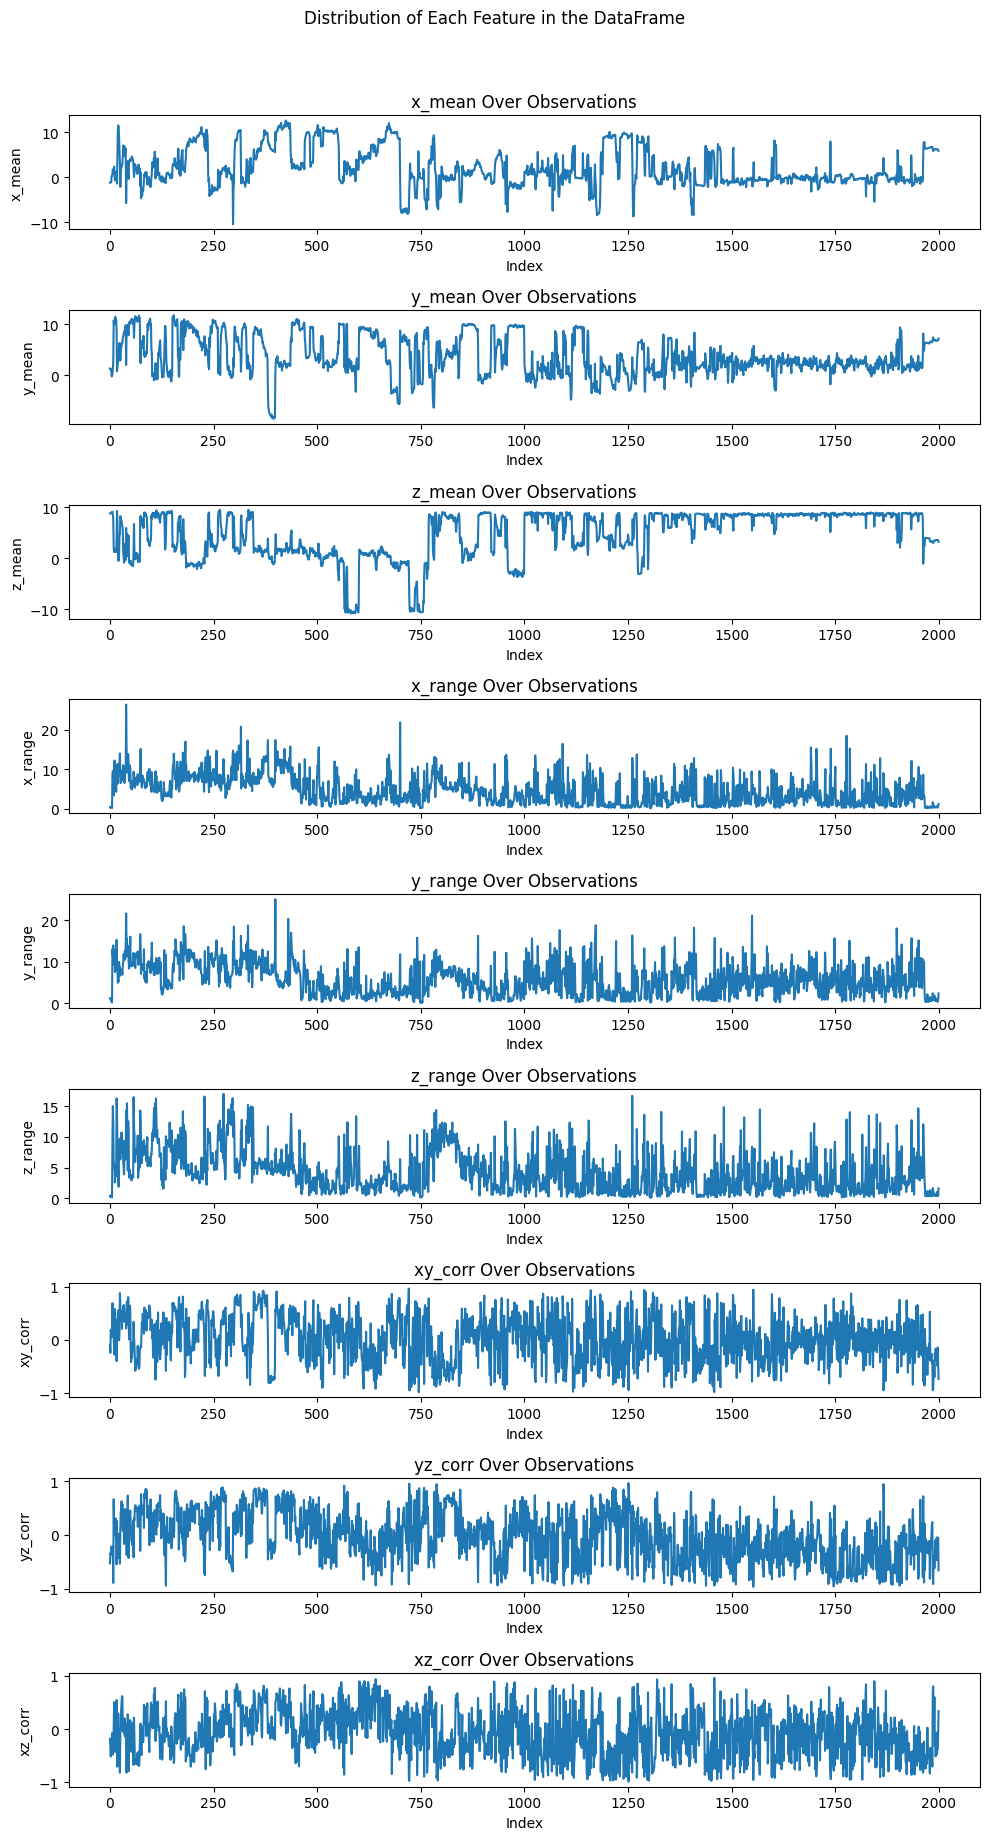

In [43]:
# Plotting each column in separate subplots for a comprehensive overview
columns_to_plot = df.columns[1:]  # Excluding 'label' column
num_columns = len(columns_to_plot)

# Creating subplots for each feature in the DataFrame
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 2 * num_columns))
fig.suptitle("Distribution of Each Feature in the DataFrame", y=1.02)

# Plot each column in a separate subplot
for i, column in enumerate(columns_to_plot):
    axes[i].plot(df.index, df[column])
    axes[i].set_title(f"{column} Over Observations")
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### Generating a sample correlation matrix

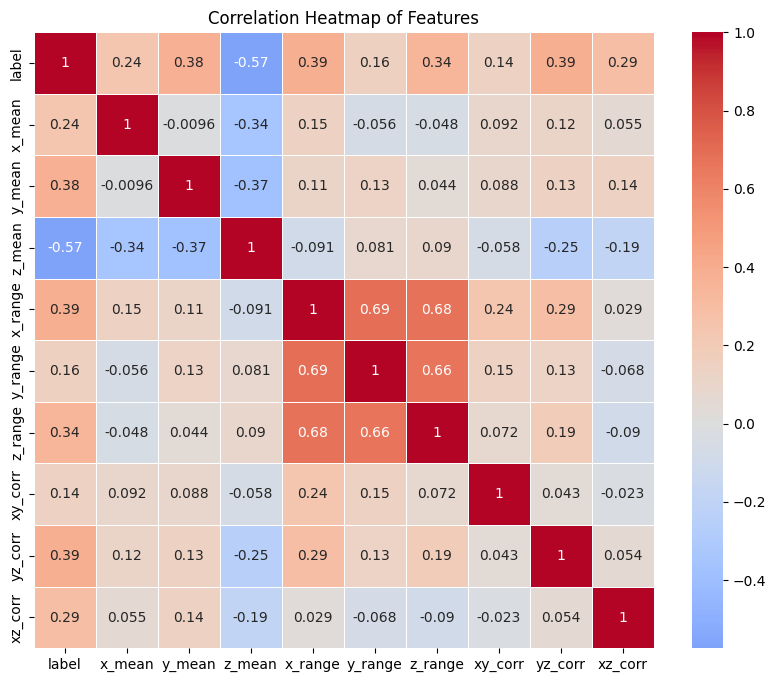

In [44]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

### Pair Plot

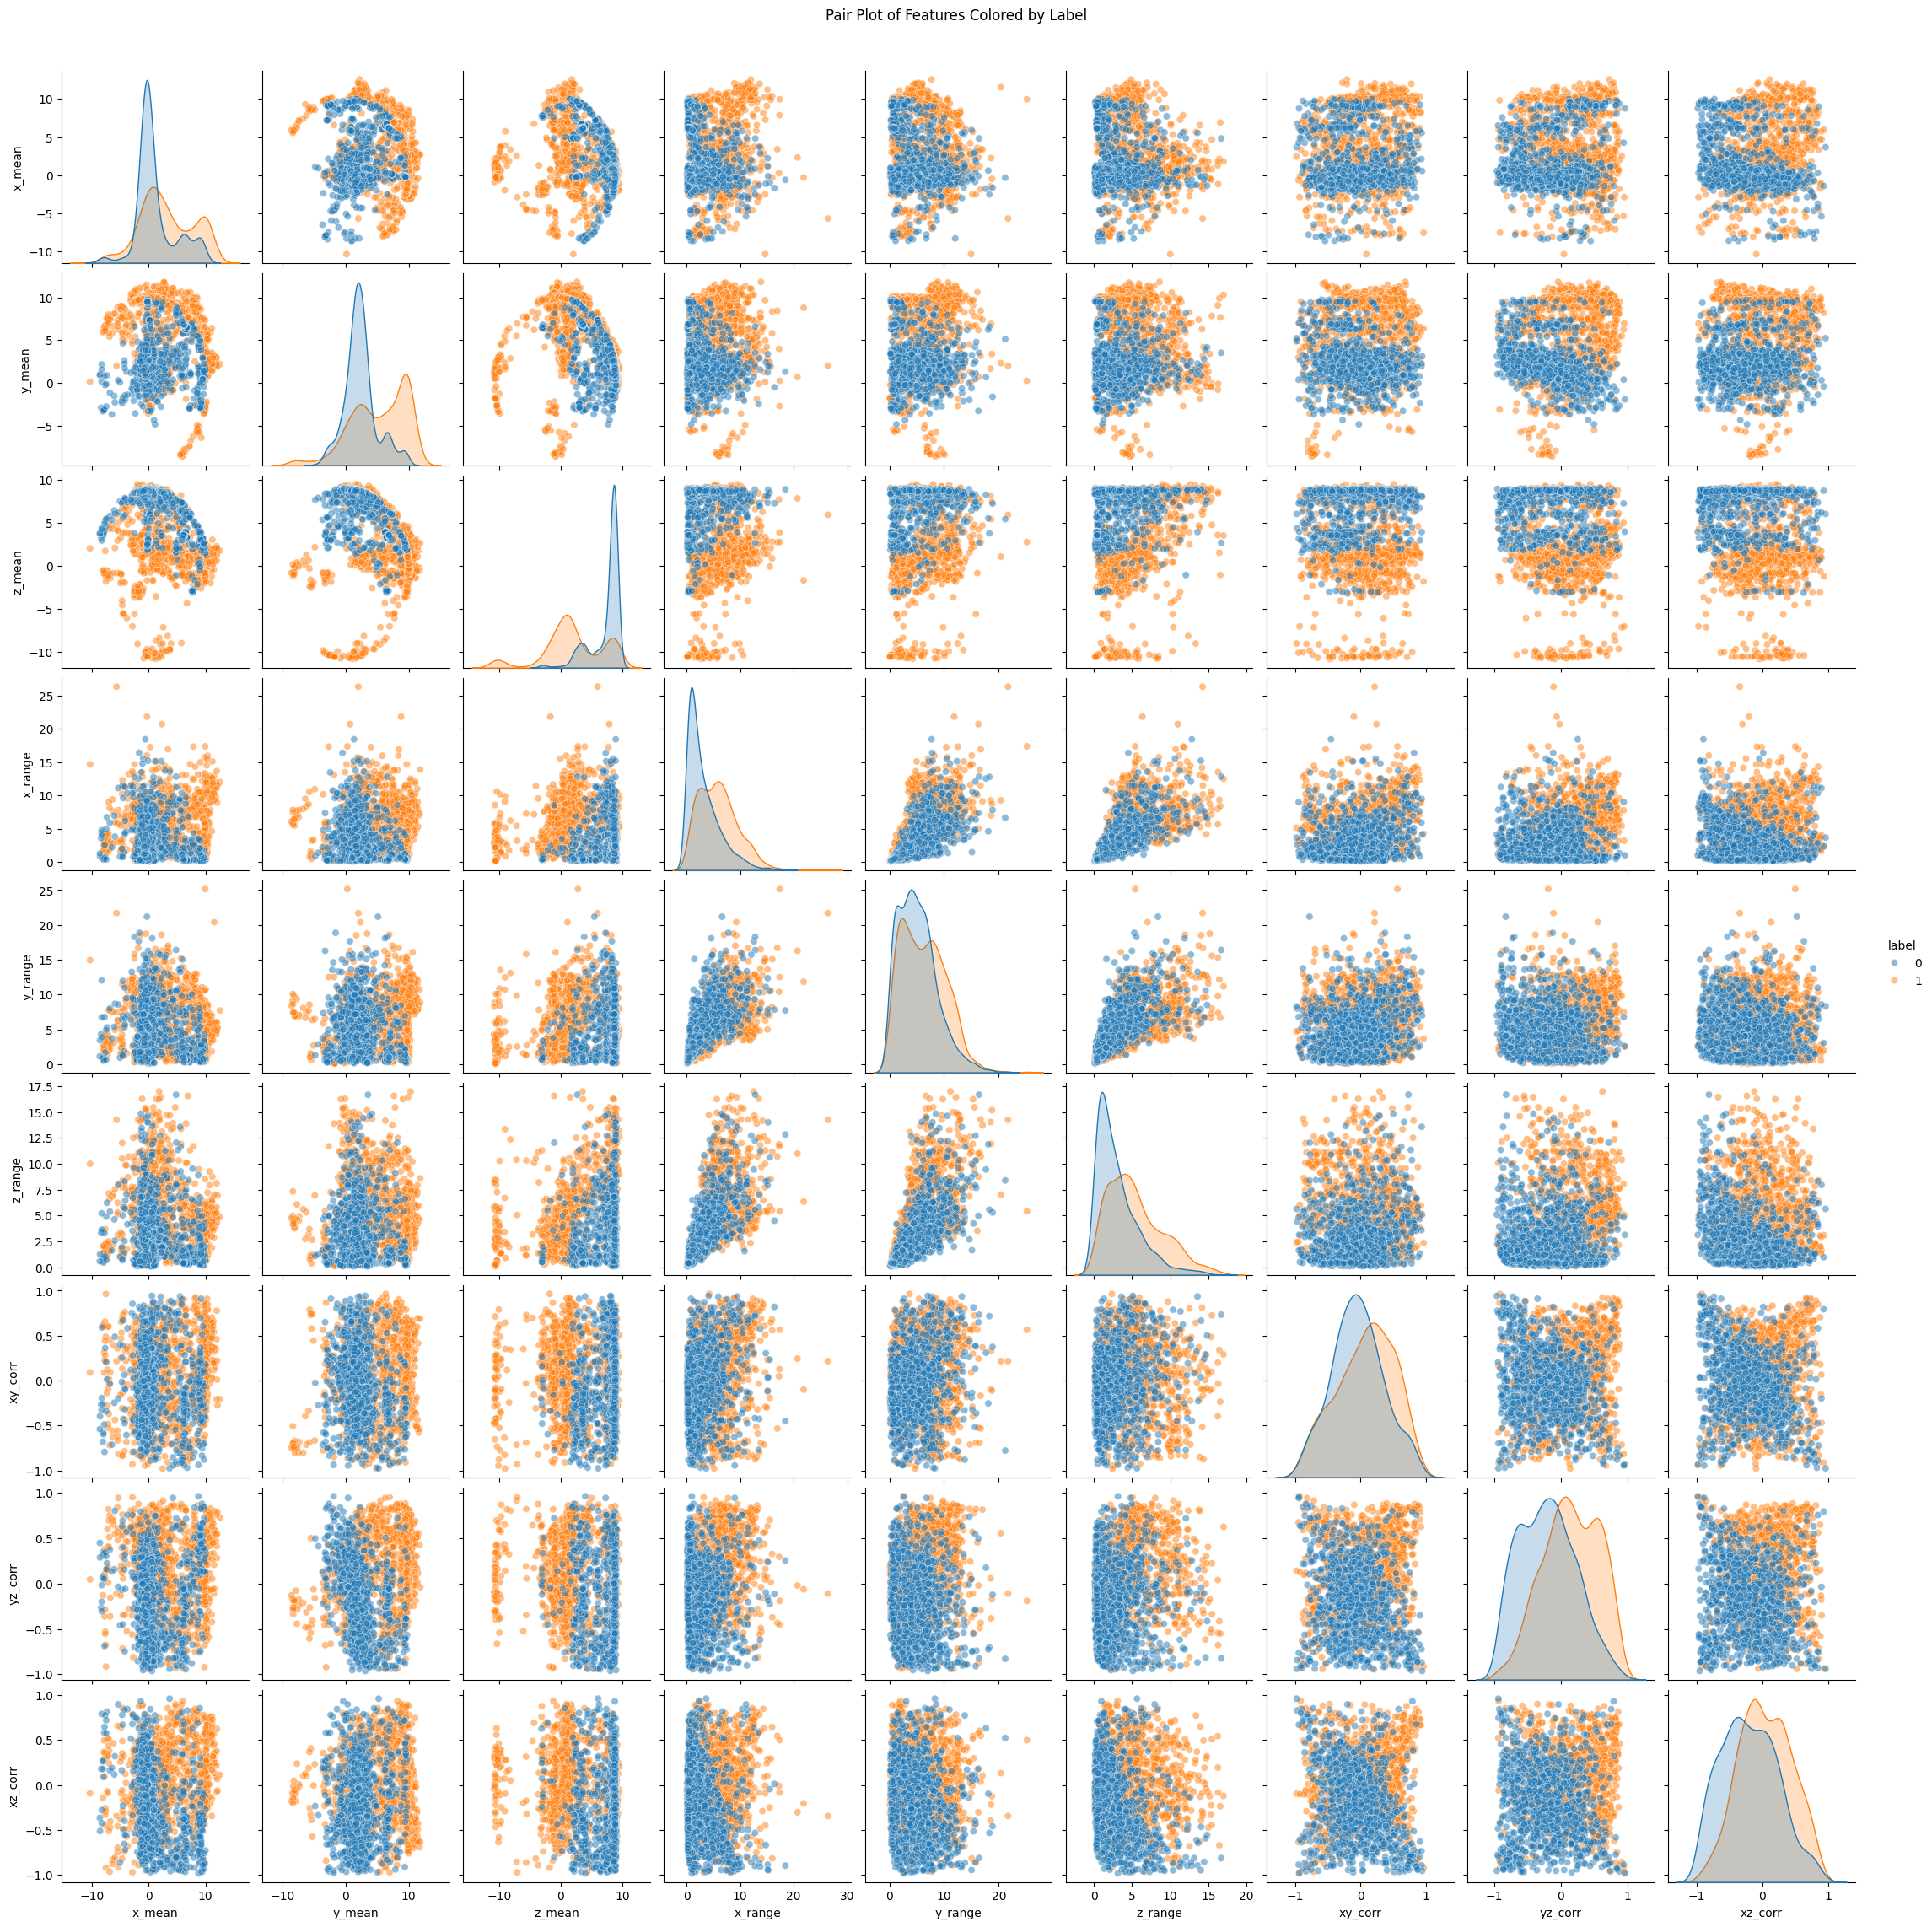

In [46]:
# Plot pairwise relationships in the dataset
sns.pairplot(df, hue='label', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Features Colored by Label", y=1.02)
plt.show()

# Machine Learning

<hr>
We can now train the model. For this week, let's use a Support Vector Machine (SVM) model. SVM is commonly used in binary classification and works well on small-to-medium sized data.

As SVM relies on the concept of distance between data points to find the optimal hyperplane that separates different classes, scaling is required to put features into similar ranges. 
<hr>

### Separate the features and target variable from the dataset

In [52]:
X = df.iloc[:, 1:]   # All columns after the first one are features
y = df['label']      # The first column is the target (label)

In [53]:
X

x_mean    y_mean    z_mean   x_range   y_range   z_range   xy_corr  \
0    -1.196411  1.313437  8.807025  0.274586  1.216025  0.353039 -0.098106   
1    -1.148686  1.106844  8.848213  0.274586  1.059118  0.235360 -0.240468   
2    -1.143455  1.148686  8.851482  0.431493  0.784532  0.431493  0.187816   
3    -1.117304  1.165684  8.823370  0.235360  0.902212  0.313813  0.091160   
4     0.271971 -0.209209  9.054153  0.156906  0.235360  0.235360  0.109223   
...        ...       ...       ...       ...       ...       ...       ...   
1995  6.158576  6.832620  3.602309  0.627626  1.098345  1.019892 -0.222889   
1996  6.191265  6.794047  3.607540  0.313813  0.588399  0.353039 -0.482589   
1997  6.179497  6.812353  3.601002  0.235360  0.313813  0.431493 -0.139266   
1998  6.101698  6.884922  3.572889  0.470719  0.980665  0.392266 -0.443920   
1999  5.864377  7.224232  3.247309  1.137571  2.392823  1.608291 -0.732138   

       yz_corr   xz_corr  
0    -0.526352 -0.182488  
1    -0.340499 -0.322237  
2    -0.364041 -0.513297  
3    -0.215989 -0.238869  
4    -0.355972 -0.468424  
...        ...       ...  
1995 -0.062302 -0.477676  
1996 -0.040348 -0.378993  
1997 -0.177081 -0.378796  
1998 -0.060412 -0.089779  
1999 -0.656865  0.340857  

[2000 rows x 9 columns]

In [54]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: label, Length: 2000, dtype: int64

### Normalize the data

In [55]:
scaler = StandardScaler()               # Initialize the StandardScaler
X_normalized = scaler.fit_transform(X) # Fit the scaler to the features (X) and transform them to standardize
X_normalized

array([[-0.77763893, -0.63530781,  0.90317761, ..., -0.2687097 ,
        -1.09678083, -0.2408278 ],
       [-0.76640983, -0.68909079,  0.91206351, ..., -0.60724429,
        -0.68577841, -0.56632177],
       [-0.76517924, -0.67819803,  0.91276874, ...,  0.41121031,
        -0.73784045, -1.01132414],
       ...,
       [ 0.95779658,  0.79623857, -0.2199722 , ..., -0.36658596,
        -0.32438925, -0.69805523],
       [ 0.9394916 ,  0.81513069, -0.22603718, ..., -1.09105009,
        -0.06638503, -0.02489821],
       [ 0.88365371,  0.90346413, -0.29627812, ..., -1.77642952,
        -1.38540358,  0.97810711]])

### Split the dataset into training and testing sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)  # Using 80% of the samples for training, and 20% for testing

### Check the shape of all of these

In [57]:
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (1600, 9)
X_test shape  is :  (400, 9)
y_train shape is :  (1600,)
y_test shape is  :  (400,)


## ML Model 

<hr>

SVM is a flexible algorithm that can use different "kernels" to train the model. Each kernel employs a specific equation to calculate the similarity between data points. The four commonly used kernels are:

- Linear Kernel: Best for linearly separable data, simplest and fastest.
- Polynomial Kernel: Introduces polynomial decision boundaries, useful for more complex patterns but can be computationally expensive.
- RBF (Gaussian) Kernel: Highly flexible, effective for non-linear data, but computationally intensive and requires careful parameter tuning.
- Sigmoid Kernel: Similar to neural networks, less common in practice, can be harder to control and interpret.

For this task, let's attempt the polynomial kernel. 
<hr>

### Create an SVM classifier with a polynomial kernel

In [58]:
svm_model = SVC(kernel='poly')

### Train the SVM model

In [59]:
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

### Evaluate the model performance

In [60]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       215
           1       0.95      0.85      0.90       185

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400



### Display a confusion matrix to visualize the classification performance

Text(0.5, 1.0, 'Confusion Matrix')

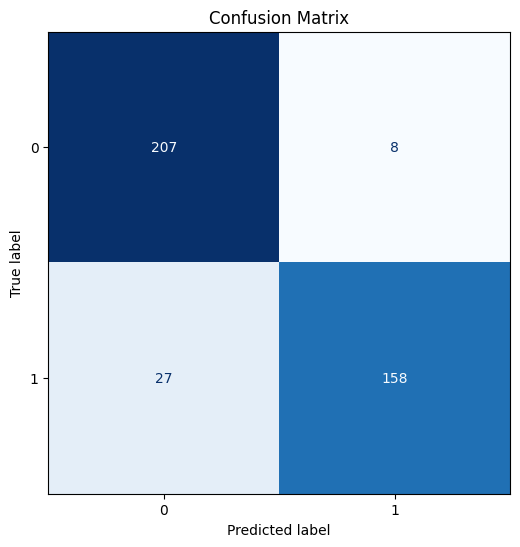

In [61]:
# Display a confusion matrix to visualize the classification performance
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")

# Save the trained model to a file

<hr>

Now that we've trained the model, we can use the test data to evaluate its accuracy. If everything is working correctly, you should see an accuracy of approximately 90%, as the two motions are fairly distinguishable.

Next up, let's explore how to deploy your model to your Raspberry Pi using the `Pickle` package.

<hr>

In [62]:
import pickle   # Import the pickle module for saving and loading Python objects

In [63]:
# the file is essentially a stream of bytes; it's common to use .pkl as the file extension
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

In [64]:
# we will also need the same scaler which was used to train the model
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

<hr>

You can find the two .pkl files in the same directory as this Notebook. You can send the files to the Raspberry Pi using scp (secure file copy over SSH).

`scp svm_model.pkl [user]@[hostname]:~\Documents`

`scp scaler.pkl [user]@[hostname]:~\Documents`

On your Raspberry Pi, you can load the files back into Python objects, provided that the scikit-learn library is of the same verision. You can check this on your Pi using the following command in a terminal:

`pip show scikit-learn`

You should get something like this on your Pi: 

```
Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author:
Author-email:
License: new BSD
Location: C:\Users\TawLe\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by:
```

<hr>

In [65]:
# Run this cell to check the version of scikit-learn on your PC

import sklearn
sklearn.__version__

'1.5.1'

<hr>

Check that the two versions match. If not, you might need to upgrade scikit-learn on your Pi: 

`pip install --upgrade scikit-learn --break-system-packages`

Once comepleted, you can move on to loading the model into your Pi.

<b>Note: executing the following cell may not cause error in Jupyter Notebook, but you should continue on your Raspberry Pi to deploy the model.</b>

Create a new Python script in the directory where you saved the two .pkl files (i.e. `~\Documents`). Experiment with the following code:  

<hr>

# Run this on your Pi

### To use the deployed model and make a single prediction

In [74]:
# A dummy data point created with arbitary values

import warnings
import pickle
import numpy as np

warnings.filterwarnings("ignore")

with open('svm_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
    
features = np.array([6.0, 6.3, 2.1, 2.5, 1.3, 4.6, 0, 0, -0.1,]).reshape(1, -1)

# use the same scaler to transform data, as we did in training
features_normalized = scaler.transform(features)

# make a single prediction using fake features
predicted_label = model.predict(features_normalized)[0]

if predicted_label == 0:
    print("Walking")
elif predicted_label == 1:
    print("Sitting")
else:
    print("Unknown activity")

Sitting


### Continuously retrieve data from MongoDB and make predictions

### Upload the *mongodb_test_data.csv* on MongoDB

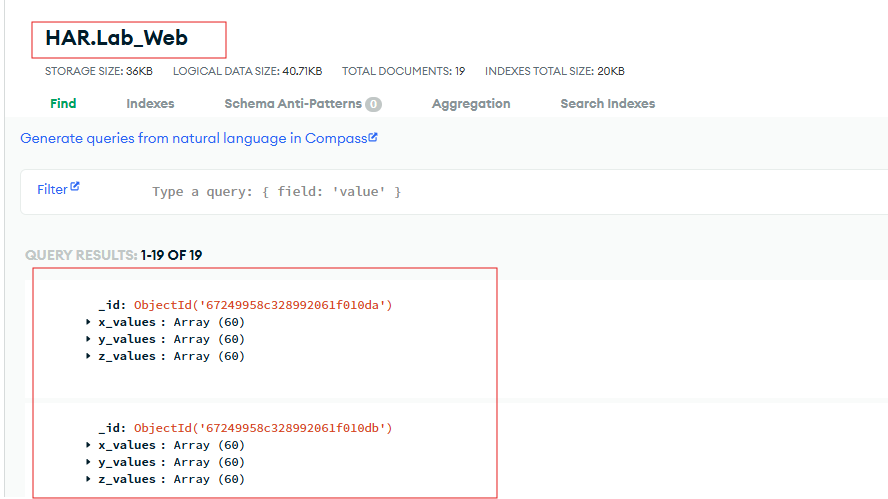

### Run this code on your Pi

In [7]:
import warnings
import pickle
import numpy as np
from pymongo import MongoClient
import time

warnings.filterwarnings("ignore")

# Load the model and scaler
with open('svm_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Connect to MongoDB
client = MongoClient("mongodb+srv://stanzir...........") # Replace MongoDB URI connection string
db = client["HAR"]  # Replace Database name
collection = db["Lab_Web"] # Replace collection name

# Global variable to store the latest prediction
latest_prediction = "Waiting for data..."

def calculate_features(data):
    x_values = np.array(data.get('x_values', []))
    y_values = np.array(data.get('y_values', []))
    z_values = np.array(data.get('z_values', []))

    if x_values.size > 0 and y_values.size > 0 and z_values.size > 0:
        x_mean = np.mean(x_values)
        y_mean = np.mean(y_values)
        z_mean = np.mean(z_values)
        x_range = np.max(x_values) - np.min(x_values)
        y_range = np.max(y_values) - np.min(y_values)
        z_range = np.max(z_values) - np.min(z_values)
        xy_corr = np.corrcoef(x_values, y_values)[0, 1] if x_values.size > 1 else 0
        yz_corr = np.corrcoef(y_values, z_values)[0, 1] if y_values.size > 1 else 0
        xz_corr = np.corrcoef(x_values, z_values)[0, 1] if z_values.size > 1 else 0
        return np.array([[x_mean, y_mean, z_mean, x_range, y_range, z_range, xy_corr, yz_corr, xz_corr]])
    else:
        return np.zeros((1, 9))

def fetch_and_predict():
    global latest_prediction
    last_id = None

    try:
        while True:
            query = {} if last_id is None else {"_id": {"$gt": last_id}}
            data = collection.find_one(query, sort=[("_id", 1)])

            if data:
                last_id = data["_id"]
                features = calculate_features(data)
                features_normalized = scaler.transform(features)
                predicted_label = model.predict(features_normalized)[0]

                if predicted_label == 0:
                    latest_prediction = "Walking"
                elif predicted_label == 1:
                    latest_prediction = "Sitting"
                else:
                    latest_prediction = "Unknown activity"

                print(f"Prediction for document {last_id}: {latest_prediction}")
            else:
                print("No new data found. Waiting...")
                time.sleep(5)

    except KeyboardInterrupt:
        print("Prediction loop interrupted. Exiting gracefully.")

# Start the prediction loop
fetch_and_predict()

Prediction for document 67249958c328992061f010da: Sitting
Prediction for document 67249958c328992061f010db: Walking
Prediction for document 67249958c328992061f010dc: Sitting
Prediction for document 67249958c328992061f010dd: Walking
Prediction for document 67249958c328992061f010de: Sitting
Prediction for document 67249958c328992061f010df: Sitting
Prediction for document 67249958c328992061f010e0: Walking
Prediction for document 67249958c328992061f010e1: Sitting
Prediction for document 67249958c328992061f010e2: Sitting
Prediction for document 67249958c328992061f010e3: Walking
Prediction for document 67249958c328992061f010e4: Sitting
Prediction for document 67249958c328992061f010e5: Sitting
Prediction for document 67249958c328992061f010e6: Walking
Prediction for document 67249958c328992061f010e7: Sitting
Prediction for document 67249958c328992061f010e8: Sitting
Prediction for document 67249958c328992061f010e9: Walking
Prediction for document 67249958c328992061f010ea: Walking
Prediction for

<hr>
<h2> Final Challenge: Real-Time Activity Prediction </h2>

Now that we’ve covered everything, your task is to write a Python program that continuously collects acceleration data from the ADXL343 sensor, calculates specific features, and uses the deployed ML model to predict whether the person is walking or sitting. All the code you need can be found in the previous practicals—you just need to put the pieces together.

<b>This task closely resembles what you will need to do for your project, so the solution will not be published.</b> However, if you get stuck, don’t hesitate to discuss it with your tutor.

<hr>